### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut
from scipy.interpolate import interp1d
%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
from scipy.interpolate import interp1d
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/mocsy-master')
import mocsy
import gsw

In [5]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [6]:
import xarray as xr
tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/oneyear2009ukesm/'
w = xr.open_dataset(f'{tdir}medusa_bc370o_1m_20090301-20090401_ptrc-T.nc')

w

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 75, nvertex: 4, time_counter: 1, x: 362, y: 332)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) float64 0.0
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables: (12/44)
    bounds_lon            (y, x, nvertex) float32 ...
    bounds_lat            (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    thkcello              (time_counter, deptht, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    ...                    ...
    CFC11_E3T             (time_counter, deptht, y, x) float32 ...
    CFC12                 (time_counter, deptht, y, x) float32 ...
    CFC12_E3T             (time_counter, deptht, y, x) float32 ...
    SF6                   (time_counter, deptht, y, x) float32 ...
    SF6_E3T               (time_counter, deptht, y, x) float32 ...
    Age                   (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         bc370o_1m_20090101_20090330
    description:  Medusa sms variables
    title:        Medusa sms variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Jan-03 12:33:04 UTC
    ibegin:       0
    ni:           362
    jbegin:       0
    nj:           56
    file_name:    medusa_bc370o_1m_20090301-20090401_ptrc-T.nc
    TimeStamp:    03/01/2019 14:38:48 +0000

In [10]:
def get_weighted(ts,bgc, diadaux):
    
    T_mean = ts.votemper.isel(y=slice(0,114),deptht = 0).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
    DIC_mean = bgc.DIC.isel(y=slice(0,114),deptht = 0).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
    ALK_mean = bgc.ALK.isel(y=slice(0,114),deptht = 0).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
    OCNPCO2_mean = diadaux.OCN_PCO2.isel(y=slice(0,114)).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
    OCNDPCO2_mean = diadaux.OCN_DPCO2.isel(y=slice(0,114)).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
    CO2FLUX_mean = diadaux.CO2FLUX.isel(y=slice(0,114)).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
   
    return T_mean, DIC_mean, ALK_mean, OCNPCO2_mean, OCNDPCO2_mean, CO2FLUX_mean

def get_revelle(ts,bgc):
    
    tmask = xr.open_dataset(f'/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask.nc')
    tmask_surf = tmask.tmask[0,0,:,:] * tmask.e1t[0,:,:] * tmask.e2t[0,:,:]
    
    DIC = bgc.DIC.isel(y=slice(0,114),deptht = 0).values
    ALK = bgc.ALK.isel(y=slice(0,114),deptht = 0).values
    votemper = ts.votemper.isel(y=slice(0,114),deptht = 0).values
    vosaline = ts.vosaline.isel(y=slice(0,114),deptht = 0).values
    
    tdra = np.ravel(DIC * 1e-3) #DIC, convert mol/L to mol/m3 (1000 L/m3)
    ttara = np.ravel(ALK * 1e-3) #Alkalinity, convert mol/L to mol/m3 (1000 L/m3)
    tsra = np.ravel(vosaline) #salt
    tsra_psu = np.ravel(vosaline) *35/35.16504 #g/kg to psu (salt)
    ttera = np.ravel(votemper)

    tdepth = np.zeros_like(ttera)
    tdepth[:] = 0
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepth)
    tzero = np.zeros_like(tdepth)
    tpressure = np.zeros_like(tdepth)



    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    BetaD = BetaD.reshape(12,114, 362)
    BetaD[BetaD>100] = np.nan
    Revelle = bgc.DIC.isel(y=slice(0,114),deptht = 0).copy()
    Revelle[:] = BetaD
    Revelle_mean = Revelle.isel(y=slice(0,114)).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])

    return Revelle_mean 

def get_grads(bgc, verbose = False):
    
    tmask = xr.open_dataset(f'/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask.nc')
    tmask_surf = tmask.tmask[0,0,:,:] * tmask.e1t[0,:,:] * tmask.e2t[0,:,:]
    grad_dic_0_100_ar = np.zeros([12])
    grad_dic_0_200_ar = np.zeros([12])
    grad_dic_100_200_ar = np.zeros([12])
    grad_avg2_ar = np.zeros([12])
    DIC_1000_minus_0_ar = np.zeros([12])

    for m in range(12):
        DIC = bgc.DIC.isel(y=slice(0,114)).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y'])
        dic_0 = DIC[m,0]
        if np.isnan(dic_0):
            pass

        else:

            depth_0 = bgc.deptht[0]
            depths_first100 = bgc.deptht[0:25]
            dics_first100 = DIC[m,0:25]
            f = interp1d(depths_first100, dics_first100, kind='linear')
            dic_100 = f(100)

            depths_second100 = bgc.deptht[24:32]
            dics_second100 = DIC[m,24:32]
            f = interp1d(depths_second100, dics_second100, kind='linear')
            dic_200 = f(200)

            grad_dic_0_100 = ((dic_100-dic_0)/(100-depth_0)).values
            grad_dic_0_200 = ((dic_200-dic_0)/(200-depth_0)).values
            
            grad_dic_100_200 = ((dic_200-dic_100)/(200-100))
            grad_avg2 = (grad_dic_100_200+grad_dic_0_100)/2
            if verbose:
                print(grad_dic_0_100)
                print(grad_dic_0_200)
                print(grad_dic_100_200)
                print(grad_avg2)

            #bgc.deptht[44:50]
            depths_1000 = bgc.deptht[44:50]
            dics_1000 = DIC[m,44:50]
            f = interp1d(depths_1000, dics_1000, kind='linear')
            dic_1000 = f(1000)    
            DIC_1000_minus_0 = (dic_1000-dic_0).values

            if verbose:
                plt.plot(DIC[m,0:32],-bgc.deptht[0:32])
                plt.plot(dic_100, -100, 'ro')
                plt.plot(dic_200, -200, 'r+')

                print(f'grad_dic_0_100 {grad_dic_0_100}')
                print(f'grad_dic_0_200 {grad_dic_0_200}')
                print(f'grad_dic_100_200 {grad_dic_100_200}')
                print(f'grad_avg2 {grad_avg2}')
                print(f'DIC_1000_minus_0 {DIC_1000_minus_0}')

            grad_dic_0_100_ar[m] = grad_dic_0_100
            grad_dic_0_200_ar[m] = grad_dic_0_200
            grad_dic_100_200_ar[m] = grad_dic_100_200
            grad_avg2_ar[m] = grad_avg2
            DIC_1000_minus_0_ar[m] = DIC_1000_minus_0
            
    return grad_dic_0_100_ar, grad_dic_0_200_ar, grad_dic_100_200_ar, grad_avg2_ar, DIC_1000_minus_0_ar

def make_yearlist(yr, scen):
    
    tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/'

    if yr < 2015:
        runid = 'bc370'
    else:
        if scen == '1A':
            runid = 'be682'
        if scen == '1B':
            runid = 'ce417'

    bgc = xr.open_dataset(f'{tdir}medusa_{runid}_1y_{yr}_ptrc-T-CHLTADIC.nc')
    ts = xr.open_dataset(f'{tdir}nemo_{runid}_1y_{yr}_grid-T-TS.nc')
    diadaux = xr.open_dataset(f'{tdir}medusa_{runid}_1y_{yr}_diad-T-aux.nc')
    
    return bgc, ts, diadaux

def save_cchem_param(scen,yr):
    
    bgc,ts, diadaux = make_yearlist(yr, scen)
    
    savenam = f'./data/cchem-param-medusa_scen-{scen}-{yr}.nc'
    times = pd.date_range(f"{yr}/01/01",f"{yr}/12/11",freq='MS')#,closed='left')

    data_vars = {
                ### bgc gradients
        'grad_dDICdz': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        'grad_DIC_surfdeep': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),

                ### carbonate system variables
        'mn_kg': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        'mn_SST': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        'mn_Revfact': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        'mn_DIC': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        'mn_TA': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        'mn_pCO2': (['time_counter', 'quantity'], np.zeros([12,4]),
                {'units': ''}),
        }

    coords = {'time_counter': (['time_counter'], times),
            'quantity': (['mean', 'stdev', 'max', 'min']),

    }
    # define global attributes
    attrs = {'made in':'scratch/BOE-SOcarbon/extract_BOE_parameters_from_MEDUSA.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)

    Rev_mean = get_revelle(ts,bgc)
    grad_dic_0_100_ar, grad_dic_0_200_ar, grad_dic_100_200_ar, grad_avg2_ar, DIC_1000_minus_0_ar = \
    get_grads(bgc)
    T_mean, DIC_mean, ALK_mean, OCNPCO2_mean, OCNDPCO2_mean, CO2FLUX_mean = get_weighted(ts,bgc, diadaux)

    ds['grad_dDICdz'][:,0] = grad_avg2_ar 
    ds['grad_DIC_surfdeep'][:,0] = DIC_1000_minus_0_ar; 
    ds['mn_kg'][:,0] = 0.065; 
    ds['mn_SST'][:,0] = T_mean.values; 
    ds['mn_Revfact'][:,0] = Rev_mean.values; 
    ds['mn_DIC'][:,0] = DIC_mean.values; 
    ds['mn_TA'][:,0] = ALK_mean.values; 
    ds['mn_pCO2'][:,0] = OCNPCO2_mean.values; 

    print(savenam)
    ds.to_netcdf(savenam)

    return ds
       


In [11]:
for y in range(1950,2100):
    
    save_cchem_param('1A',y)
    save_cchem_param('1B',y)

NameError: name 'tmask_surf' is not defined

## 

In [9]:
tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/'
bgc = xr.open_dataset(f'{tdir}medusa_bc370_1y_1950_ptrc-T-CHLTADIC.nc')
ts = xr.open_dataset(f'{tdir}nemo_bc370_1y_1950_grid-T-TS.nc')
diadaux = xr.open_dataset(f'{tdir}medusa_bc370_1y_1950_diad-T-aux.nc')
diadPR = xr.open_dataset(f'{tdir}medusa_bc370_1y_1950_diad-T-PR.nc')

tmask = xr.open_dataset(f'/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask.nc')
tmask_surf = tmask.tmask[0,0,:,:] * tmask.e1t[0,:,:] * tmask.e2t[0,:,:]

In [10]:
w = xr.open_dataset('/gpfs/home/mep22dku/scratch/BOE-SOcarbon/data/cchem-param-medusa_scen-1B-1950.nc')
w

<xarray.Dataset>
Dimensions:            (quantity: 4, time_counter: 12)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 1950-01-01 ... 1950-12-01
  * quantity           (quantity) object 'mean' 'stdev' 'max' 'min'
Data variables:
    grad_dDICdz        (time_counter, quantity) float64 ...
    grad_DIC_surfdeep  (time_counter, quantity) float64 ...
    mn_kg              (time_counter, quantity) float64 ...
    mn_SST             (time_counter, quantity) float64 ...
    mn_Revfact         (time_counter, quantity) float64 ...
    mn_DIC             (time_counter, quantity) float64 ...
    mn_TA              (time_counter, quantity) float64 ...
    mn_pCO2            (time_counter, quantity) float64 ...
Attributes:
    made in:  scratch/BOE-SOcarbon/extract_BOE_parameters_from_MEDUSA.py
    desc:

In [13]:

def save_cchem_param(scen,yr):
    savenam = f'./data/cchem-param-medusa_scen-{scen}-{yr}.nc'
    times = pd.date_range(f"{yr}/01/01",f"{yr}/12/11",freq='MS')#,closed='left')

    
    
    data_vars = {
                    ### bgc gradients
            'grad_dDICdz': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            'grad_DIC_surfdeep': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),

                    ### carbonate system variables
            'mn_kg': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            'mn_SST': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            'mn_Revfact': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            'mn_DIC': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            'mn_TA': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            'mn_pCO2': (['time_counter', 'quantity'], np.zeros([12,4]),
                    {'units': ''}),
            }

    coords = {'time_counter': (['time_counter'], times),
                    'quantity': (['mean', 'stdev', 'max', 'min']),

            }
            # define global attributes
    attrs = {'made in':'scratch/BOE-SOcarbon/extract_BOE_parameters_from_MEDUSA.ipynb',
            'desc': ''
            }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)

    Rev_mean = get_revelle(ts,bgc)
    grad_dic_0_100_ar, grad_dic_0_200_ar, grad_dic_100_200_ar, grad_avg2_ar, DIC_1000_minus_0_ar = \
    get_grads(bgc)
    T_mean, DIC_mean, ALK_mean, OCNPCO2_mean, OCNDPCO2_mean, CO2FLUX_mean = get_weighted(ts,bgc, diadaux)

    ds['grad_dDICdz'][:,0] = grad_avg2_ar; ds['grad_DIC_surfdeep']; resw[:,0] = DIC_1000_minus_0_ar; 
    ds['mn_kg'][:,0] = 0.065; ds['mn_SST'][:,0] = T_mean; 
    ds['mn_Revfact'][:,0] = Rev_mean; ds['mn_DIC'][:,0] = DIC_mean; 
    ds['mn_TA'][:,0] = ALK_mean; ds['mn_pCO2'][:,0] = OCNPCO2_mean; 

    print(savenam)
            #ds.to_netcdf(savenam)

In [14]:
ts.vosaline

<xarray.DataArray 'vosaline' (time_counter: 12, deptht: 75, y: 332, x: 362)>
[108165600 values with dtype=float64]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-31 ... 1950-12-31
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
Dimensions without coordinates: y, x
Attributes:
    units:      g/kg
    long_name:  salinity

In [15]:
w = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_diadT_aux/medusa_bc370o_1m_19500301-19500401_diad-T.nc')
w.OCN_PCO2

<xarray.DataArray 'OCN_PCO2' (time_counter: 1, y: 332, x: 362)>
[120184 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) object ...
  * time_counter   (time_counter) float64 0.0
Dimensions without coordinates: y, x
Attributes:
    long_name:           Surface ocean pCO2
    units:               uatm
    online_operation:    average
    interval_operation:  2700 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2700 s)
    cell_measures:       area: area

In [16]:
DIC = bgc.DIC.isel(y=slice(0,114)).mean(dim = ['x','y'])
DIC

<xarray.DataArray 'DIC' (time_counter: 12, deptht: 75)>
array([[2171.70406988, 2172.68512386, 2173.68026067, 2174.70608877,
        2175.76893281, 2176.8674212 , 2178.01122762, 2179.21538177,
        2180.49615227, 2181.88079166, 2183.51054681, 2185.17453487,
        2187.14898845, 2189.56105704, 2192.49760392, 2195.88650722,
        2199.53145496, 2203.2585063 , 2206.97186002, 2210.54262078,
        2214.03438163, 2217.54922507, 2221.20068606, 2224.8071762 ,
        2228.25634849, 2231.33882487, 2234.15337379, 2236.87947633,
        2239.54601283, 2242.37176058, 2245.08115945, 2247.82555436,
        2250.5685614 , 2253.3510264 , 2256.20726799, 2259.297986  ,
        2262.54276419, 2265.85732976, 2269.11709612, 2272.23151598,
        2275.28435976, 2278.2994606 , 2281.21029778, 2284.0715317 ,
        2286.8977686 , 2289.64905738, 2292.35215881, 2294.96762994,
        2297.47405078, 2299.85253764, 2302.06630052, 2304.1341778 ,
        2306.04965857, 2307.82313269, 2309.44002023, 2310.87103013,
        2312.07334164, 2312.98226958, 2313.60609087, 2313.98798803,
        2314.22196522, 2314.34009789, 2314.35597145, 2314.34728667,
        2314.40270206, 2314.54358907, 2314.85792831, 2315.35151942,
        2315.49087621, 2315.58598382, 2315.46457953, 2315.54180577,
        2314.04759386, 2311.25011489,           nan],
       [2172.26126191, 2172.33820927, 2172.42409561, 2172.53503988,
...
        2314.04261882, 2311.3794807 ,           nan],
       [2186.09423621, 2187.17149812, 2188.13441578, 2189.02922657,
        2189.91858035, 2190.84676097, 2191.83356822, 2192.89777084,
        2194.06002217, 2195.35634141, 2196.93222815, 2198.42879147,
        2199.97987805, 2201.55382744, 2203.17666919, 2204.93228434,
        2206.87828773, 2209.0232911 , 2211.32722296, 2213.6370425 ,
        2216.02597362, 2218.71705619, 2221.75309946, 2224.81296289,
        2227.90806619, 2230.90383393, 2233.69334082, 2236.40184673,
        2239.09856543, 2241.80798926, 2244.52694745, 2247.30857158,
        2250.09098979, 2252.96443425, 2255.92090004, 2259.10817279,
        2262.42471695, 2265.80658765, 2269.09624891, 2272.21978813,
        2275.26687097, 2278.30584577, 2281.22560849, 2284.07017387,
        2286.88036538, 2289.6139922 , 2292.29649451, 2294.89993863,
        2297.39639712, 2299.77141403, 2301.99103616, 2304.06777773,
        2305.99245814, 2307.77504431, 2309.4025651 , 2310.84337845,
        2312.05486961, 2312.97560093, 2313.6090446 , 2313.9944875 ,
        2314.22881093, 2314.33622196, 2314.34560737, 2314.32980141,
        2314.377012  , 2314.50085373, 2314.79940059, 2315.29491357,
        2315.43723012, 2315.52054046, 2315.40520109, 2315.49831793,
        2314.0585612 , 2311.39468922,           nan]])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-31 ... 1950-12-31
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03

In [17]:
w = time.time()
Rev_mean = get_revelle(ts,bgc)
grad_dic_0_100_ar, grad_dic_0_200_ar, grad_dic_100_200_ar, grad_avg2_ar, DIC_1000_minus_0_ar = get_grads(bgc)
T_mean, DIC_mean, ALK_mean, OCNPCO2_mean, OCNDPCO2_mean, CO2FLUX_mean = get_weighted(ts,bgc, diadaux)
diy = 365.5
CO2FLUX_mean_mol_m2_yr =  CO2FLUX_mean * diy * 0.001 #1 mol 1000 mmol
kg = CO2FLUX_mean_mol_m2_yr/OCNDPCO2_mean
w2 = time.time()
print(w2-w)
print(kg)

29.73094940185547
<xarray.DataArray (time_counter: 12)>
array([-0.00813497, -0.01277594, -0.00658541,  0.00771616,  0.03449217,
        0.0479823 ,  0.08825626,  0.07474513,  0.01655953, -0.01944681,
       -0.01827826, -0.01680788])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-31 ... 1950-12-31


### medusa biology

0.0005095833330415189


Text(0.5, 1.0, 'surf iron, nmol/L')

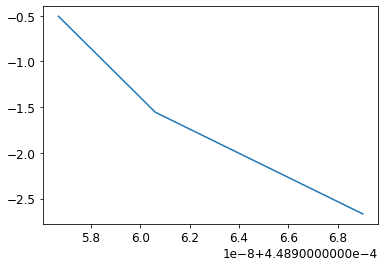

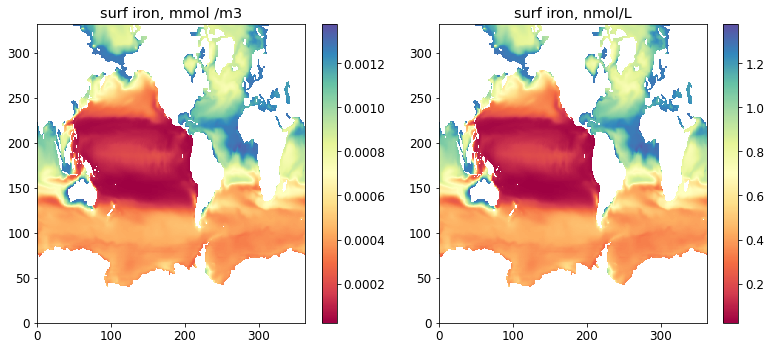

In [49]:
import xarray as xr
tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/'
w = xr.open_dataset(f'{tdir}medusa_bc370_1y_1950_ptrc-T-FERPHD.nc')

w.deptht

plt.plot(w.FER[0,0:3,100,100], -w.deptht[0:3], )

print(np.nanmax(w.FER[:,0,100,100]))

# plt.figure()
# q = plt.pcolormesh(w.FER[0,0,:,:], cmap = 'Spectral')
# plt.colorbar(q)

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].pcolormesh(w.FER[0,0,:,:], cmap = 'Spectral')
plt.colorbar(q, ax = axs[0])
axs[0].set_title('surf iron, mmol /m3')

q2 = axs[1].pcolormesh(w.FER[0,0,:,:]*1e3, cmap = 'Spectral')
plt.colorbar(q2, ax = axs[1])
axs[1].set_title('surf iron, nmol/L')

In [35]:
w

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 12, x: 362, y: 332)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-31 ... 1950-12-31
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
Dimensions without coordinates: x, y
Data variables:
    FER           (time_counter, deptht, y, x) float64 ...
    PHD           (time_counter, deptht, y, x) float64 ...
Attributes:
    made in:  SOZONE/MEDUSA/MEDUSA_PROCESSING/runner-ptrcT-FERPHD.py
    desc:     yearly medusa files, saving only variables of interest

In [64]:
## surface diatom concentration
def get_grads_fer(bgc, verbose = True):
    
    grad_FER_0_100_ar = np.zeros([12])
    grad_FER_0_200_ar = np.zeros([12])
    grad_FER_100_200_ar = np.zeros([12])
    grad_avg2_ar = np.zeros([12])
    FER_1000_minus_0_ar = np.zeros([12])

    for m in range(12):
        FER = bgc.FER.isel(y=slice(0,114)).mean(dim = ['x','y']) * 1000 #convert mmol/m3 to nmol/L
        FER_0 = FER[m,0]
        if np.isnan(FER_0):
            pass

        else:

            depth_0 = bgc.deptht[0]
            depths_first100 = bgc.deptht[0:25]
            FERs_first100 = FER[m,0:25]
            f = interp1d(depths_first100, FERs_first100, kind='linear')
            FER_100 = f(100)

            depths_second100 = bgc.deptht[24:32]
            FERs_second100 = FER[m,24:32]
            f = interp1d(depths_second100, FERs_second100, kind='linear')
            FER_200 = f(200)

            grad_FER_0_100 = ((FER_100-FER_0)/(100-depth_0)).values
            grad_FER_0_200 = ((FER_200-FER_0)/(200-depth_0)).values
            
            grad_FER_100_200 = ((FER_200-FER_100)/(200-100))
            grad_avg2 = (grad_FER_100_200+grad_FER_0_100)/2
            if verbose:
                print(grad_FER_0_100)
                print(grad_FER_0_200)
                print(grad_FER_100_200)
                print(grad_avg2)

            #bgc.deptht[44:50]
            depths_1000 = bgc.deptht[44:50]
            FERs_1000 = FER[m,44:50]
            f = interp1d(depths_1000, FERs_1000, kind='linear')
            FER_1000 = f(1000)    
            FER_1000_minus_0 = (FER_1000-FER_0).values
            
            depths_2000 = bgc.deptht[53:57]
            #print(depths_2000)
            FERs_2000 = FER[m,53:57]
            f = interp1d(depths_2000, FERs_2000, kind='linear')
            FER_2000 = f(2000)    
            FER_2000_minus_0 = (FER_2000-FER_0).values

            if verbose:
                plt.plot(FER[m,0:32],-bgc.deptht[0:32])
                plt.plot(FER_100, -100, 'ro')
                plt.plot(FER_200, -200, 'r+')
                
                print(m)
                print(f'grad_FER_0_100 {grad_FER_0_100}')
                print(f'grad_FER_0_200 {grad_FER_0_200}')
                print(f'grad_FER_100_200 {grad_FER_100_200}')
                print(f'grad_avg2 {grad_avg2}')
                print(f'FER_1000_minus_0 {FER_1000_minus_0}')
                print(f'FER_1000_minus_0 {FER_2000_minus_0}')
                print('---')

            grad_FER_0_100_ar[m] = grad_FER_0_100
            grad_FER_0_200_ar[m] = grad_FER_0_200
            grad_FER_100_200_ar[m] = grad_FER_100_200
            grad_avg2_ar[m] = grad_avg2
            FER_1000_minus_0_ar[m] = FER_1000_minus_0
            
    return grad_FER_0_100_ar, grad_FER_0_200_ar, grad_FER_100_200_ar, \
grad_avg2_ar, FER_1000_minus_0_ar, FER_2000_minus_0_ar



0.0010687770446207979
0.0007098508033310728
0.0003527398674497495
0.0007107584560352737
0
grad_FER_0_100 0.0010687770446207979
grad_FER_0_200 0.0007098508033310728
grad_FER_100_200 0.0003527398674497495
grad_avg2 0.0007107584560352737
FER_1000_minus_0 0.09461821650289015
FER_1000_minus_0 0.09384602240787088
---
0.0011866542326752602
0.0007800211474824484
0.0003754446498384689
0.0007810494412568646
1
grad_FER_0_100 0.0011866542326752602
grad_FER_0_200 0.0007800211474824484
grad_FER_100_200 0.0003754446498384689
grad_avg2 0.0007810494412568646
FER_1000_minus_0 0.10368876950714695
FER_1000_minus_0 0.10286769298041604
---
0.0009528521087126797
0.0007181028236704636
0.0004845408066452761
0.000718696457678978
2
grad_FER_0_100 0.0009528521087126797
grad_FER_0_200 0.0007181028236704636
grad_FER_100_200 0.0004845408066452761
grad_avg2 0.000718696457678978
FER_1000_minus_0 0.08769811648589004
FER_1000_minus_0 0.08680903552610902
---
0.0006473088955270642
0.000614576439486495
0.000582009531120197

NameError: name 'FER_2000_minus_0_ar' is not defined

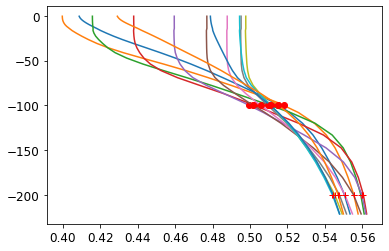

In [65]:
grad_FER_0_100_ar, grad_FER_0_200_ar, grad_FER_100_200_ar, grad_avg2_ar, FER_1000_minus_0_ar, FER_2000_minus_0_ar = \
get_grads_fer(w, verbose = True)

In [55]:
grad_avg2_ar

array([0.00071076, 0.00078105, 0.0007187 , 0.00061466, 0.00050167,
       0.00039239, 0.00031464, 0.00026274, 0.00023798, 0.00024828,
       0.00032877, 0.00059158])

In [56]:
print(FER_1000_minus_0_ar)

[0.09461822 0.10368877 0.08769812 0.06570678 0.04408634 0.02672714
 0.01583645 0.00841701 0.0058572  0.00909095 0.02463915 0.0742768 ]
